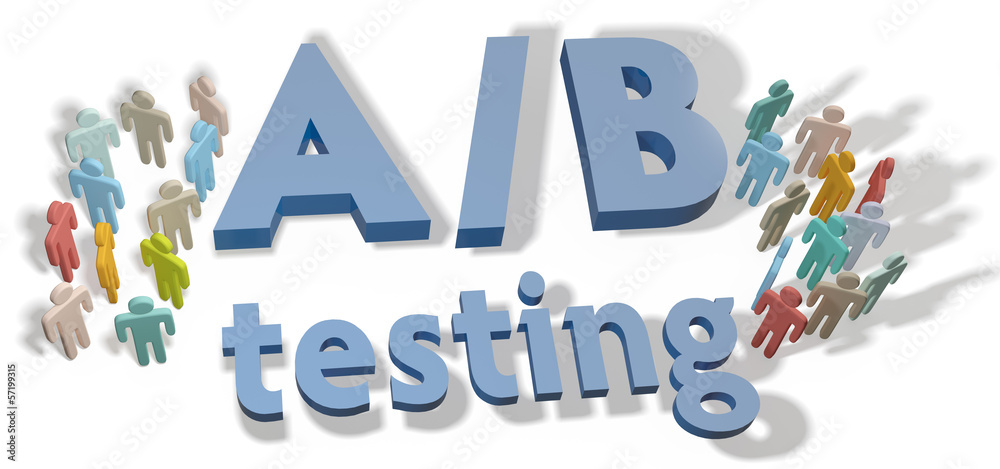

In [55]:
from IPython.display import Image
Image(filename=r"C:\Users\HP\Downloads\AB.jpeg")

#### BUSSINESS PROBLEM:


As a marketing agency, our primary objective is to maximize the return on investment (ROI) for our clients' advertising campaigns. We have conducted two ad campaigns, one on Facebook and the other on AdWords, and we need to determine which platform yields better results in terms of clicks, conversions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for our clients.

## Research Question

Which ad platform is more effective in terms of conversions, clicks, and overall cost-effectiveness?



In [56]:
## import neccessary libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy import stats
import seaborn  as sns  
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score
sns.set_style("darkgrid")
import pingouin as  pg
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi']=400
plt.rcParams['figure.figsize']=(14,5)

In [57]:
## laoding the data  
campaign_data = pd.read_csv(r"D:\datasets\marketing_campaign.csv")
## show the data  
campaign_data.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [58]:
## checking the shape of the data  
campaign_data.shape

(365, 17)

In [59]:
## checking the columns of the data  
campaign_data.columns.to_list()

['Date',
 'Facebook Ad Campaign',
 'Facebook Ad Views',
 'Facebook Ad Clicks',
 'Facebook Ad Conversions',
 'Cost per Facebook Ad',
 'Facebook Click-Through Rate (Clicks / View)',
 'Facebook Conversion Rate (Conversions / Clicks)',
 'Facebook Cost per Click (Ad Cost / Clicks)',
 'AdWords Ad Campaign',
 'AdWords Ad Views',
 'AdWords Ad Clicks',
 'AdWords Ad Conversions',
 'Cost per AdWords Ad',
 'AdWords Click-Through Rate (Clicks / View)',
 'AdWords Conversion Rate (Conversions / Click)',
 'AdWords Cost per Click (Ad Cost / Clicks)']

In [60]:
## checking for the dtypes  
campaign_data.dtypes.to_list()

[dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O')]

In [61]:
## checking for the general info  
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Date                                             365 non-null    object
 1   Facebook Ad Campaign                             365 non-null    object
 2   Facebook Ad Views                                365 non-null    int64 
 3   Facebook Ad Clicks                               365 non-null    int64 
 4   Facebook Ad Conversions                          365 non-null    int64 
 5   Cost per Facebook Ad                             365 non-null    object
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    object
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object
 8   Facebook Cost per Click (Ad Cost / Clicks)       365 non-null    object
 9   AdWords Ad Campaign                        

In [62]:
## checking for the duplicates  
sum(campaign_data.duplicated(keep='first'))

0

In [63]:
## converting date for datetime index   
campaign_data['Date']= pd.to_datetime(campaign_data['Date'])

In [64]:
## checking for descriptive stats        
campaign_data.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,365,2019-07-02 00:00:00,2019-01-01 00:00:00,2019-04-02 00:00:00,2019-07-02 00:00:00,2019-10-01 00:00:00,2019-12-31 00:00:00,NaN
Facebook Ad Views,365.0,2179.687671,1050.0,1656.0,2202.0,2717.0,3320.0,618.074639
Facebook Ad Clicks,365.0,44.049315,15.0,35.0,43.0,54.0,73.0,12.140559
Facebook Ad Conversions,365.0,11.742466,5.0,10.0,12.0,13.0,19.0,2.924786
AdWords Ad Views,365.0,4717.19726,3714.0,4247.0,4711.0,5190.0,5760.0,561.11406
AdWords Ad Clicks,365.0,60.383562,31.0,49.0,60.0,73.0,89.0,14.368225
AdWords Ad Conversions,365.0,5.980822,3.0,5.0,6.0,7.0,9.0,1.628106


###

#### Comparing Campaign Pereformance

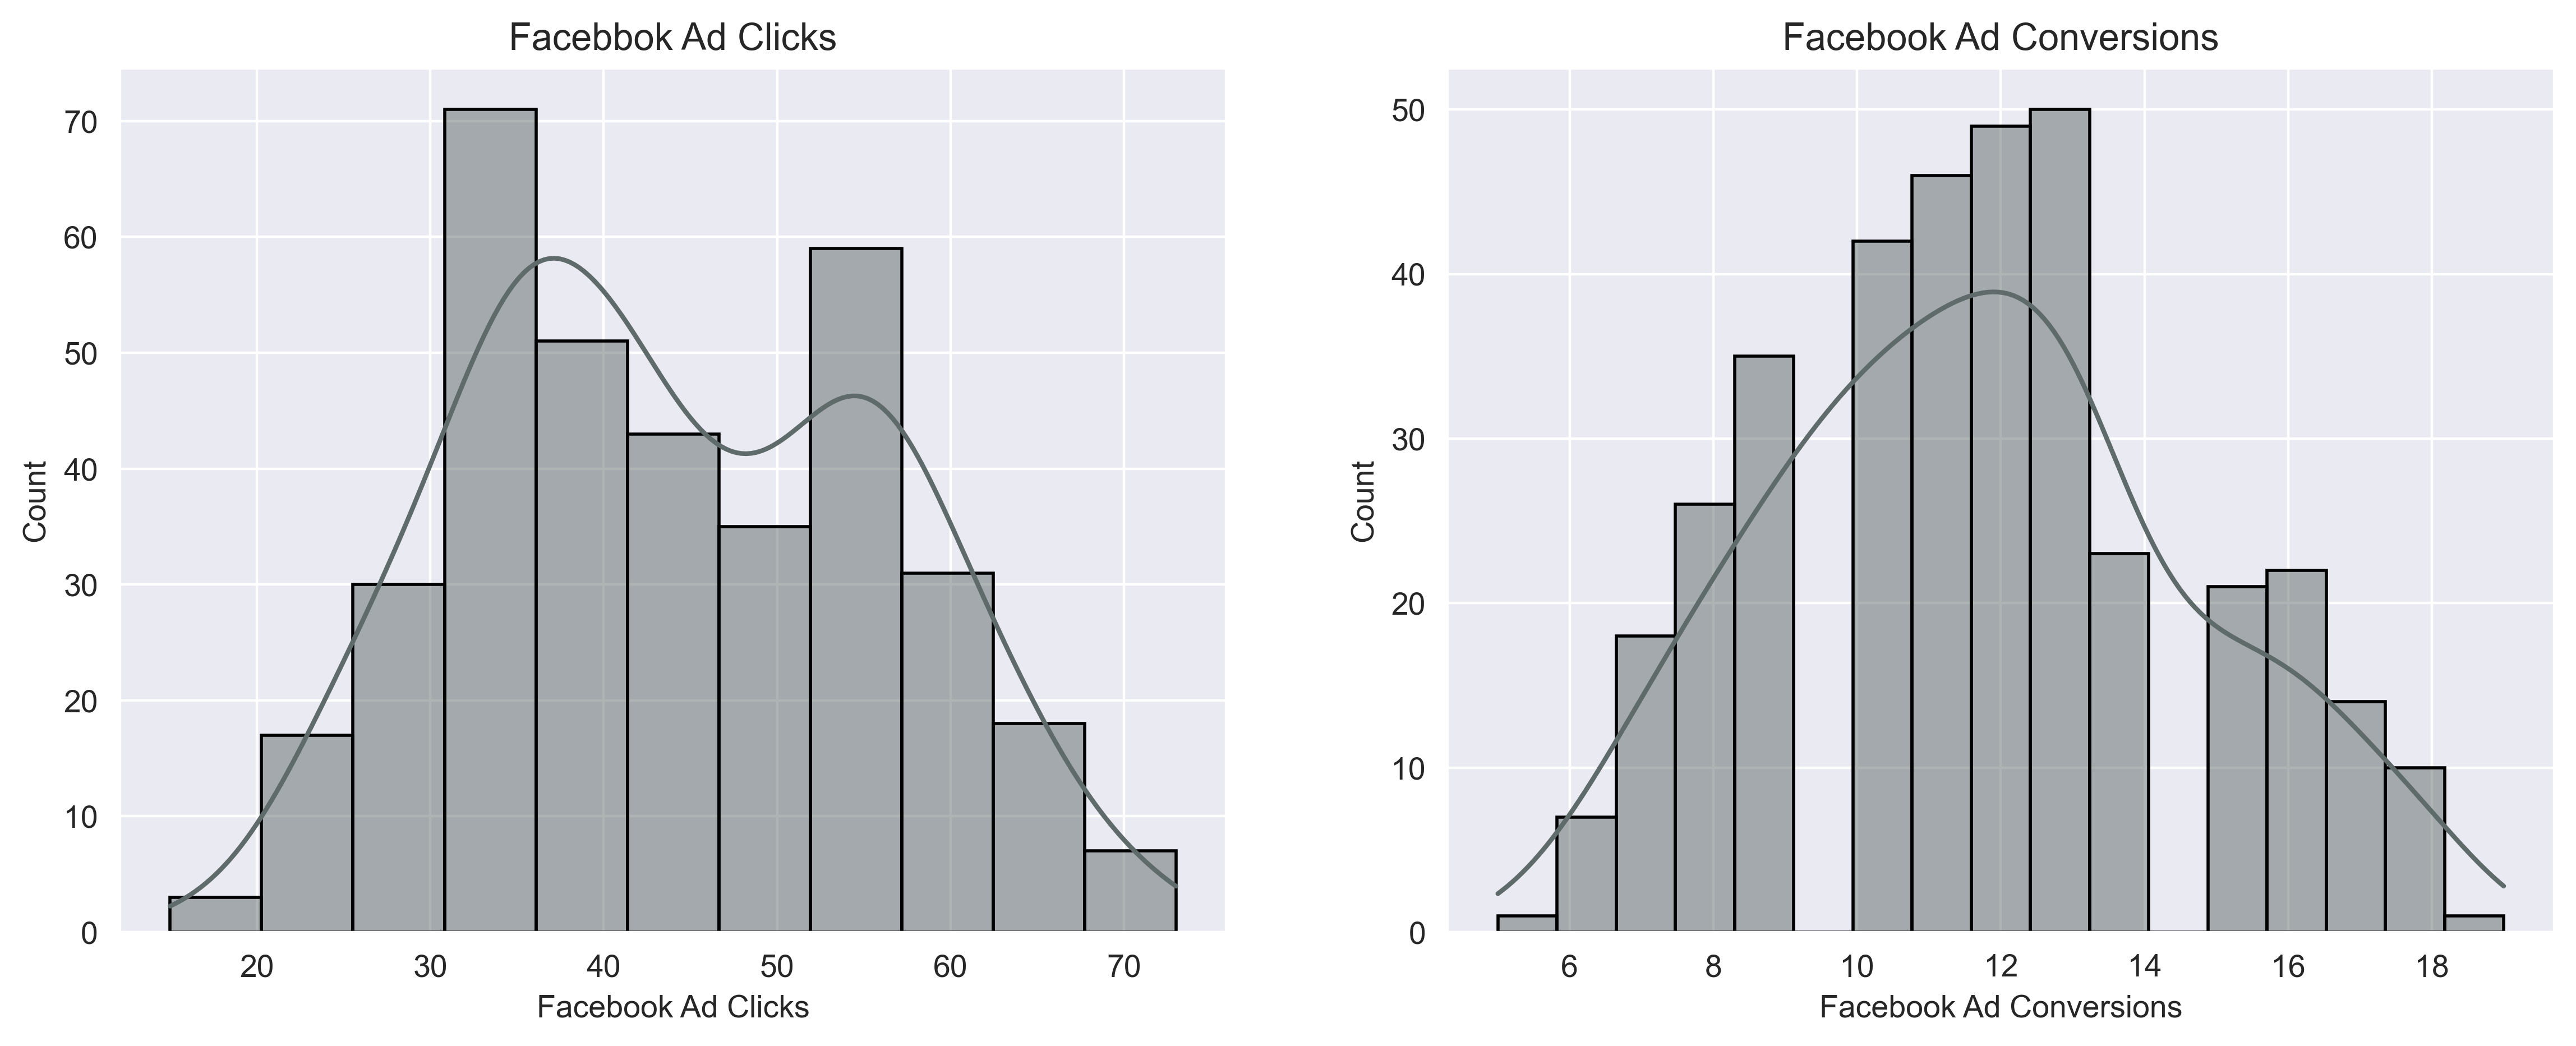

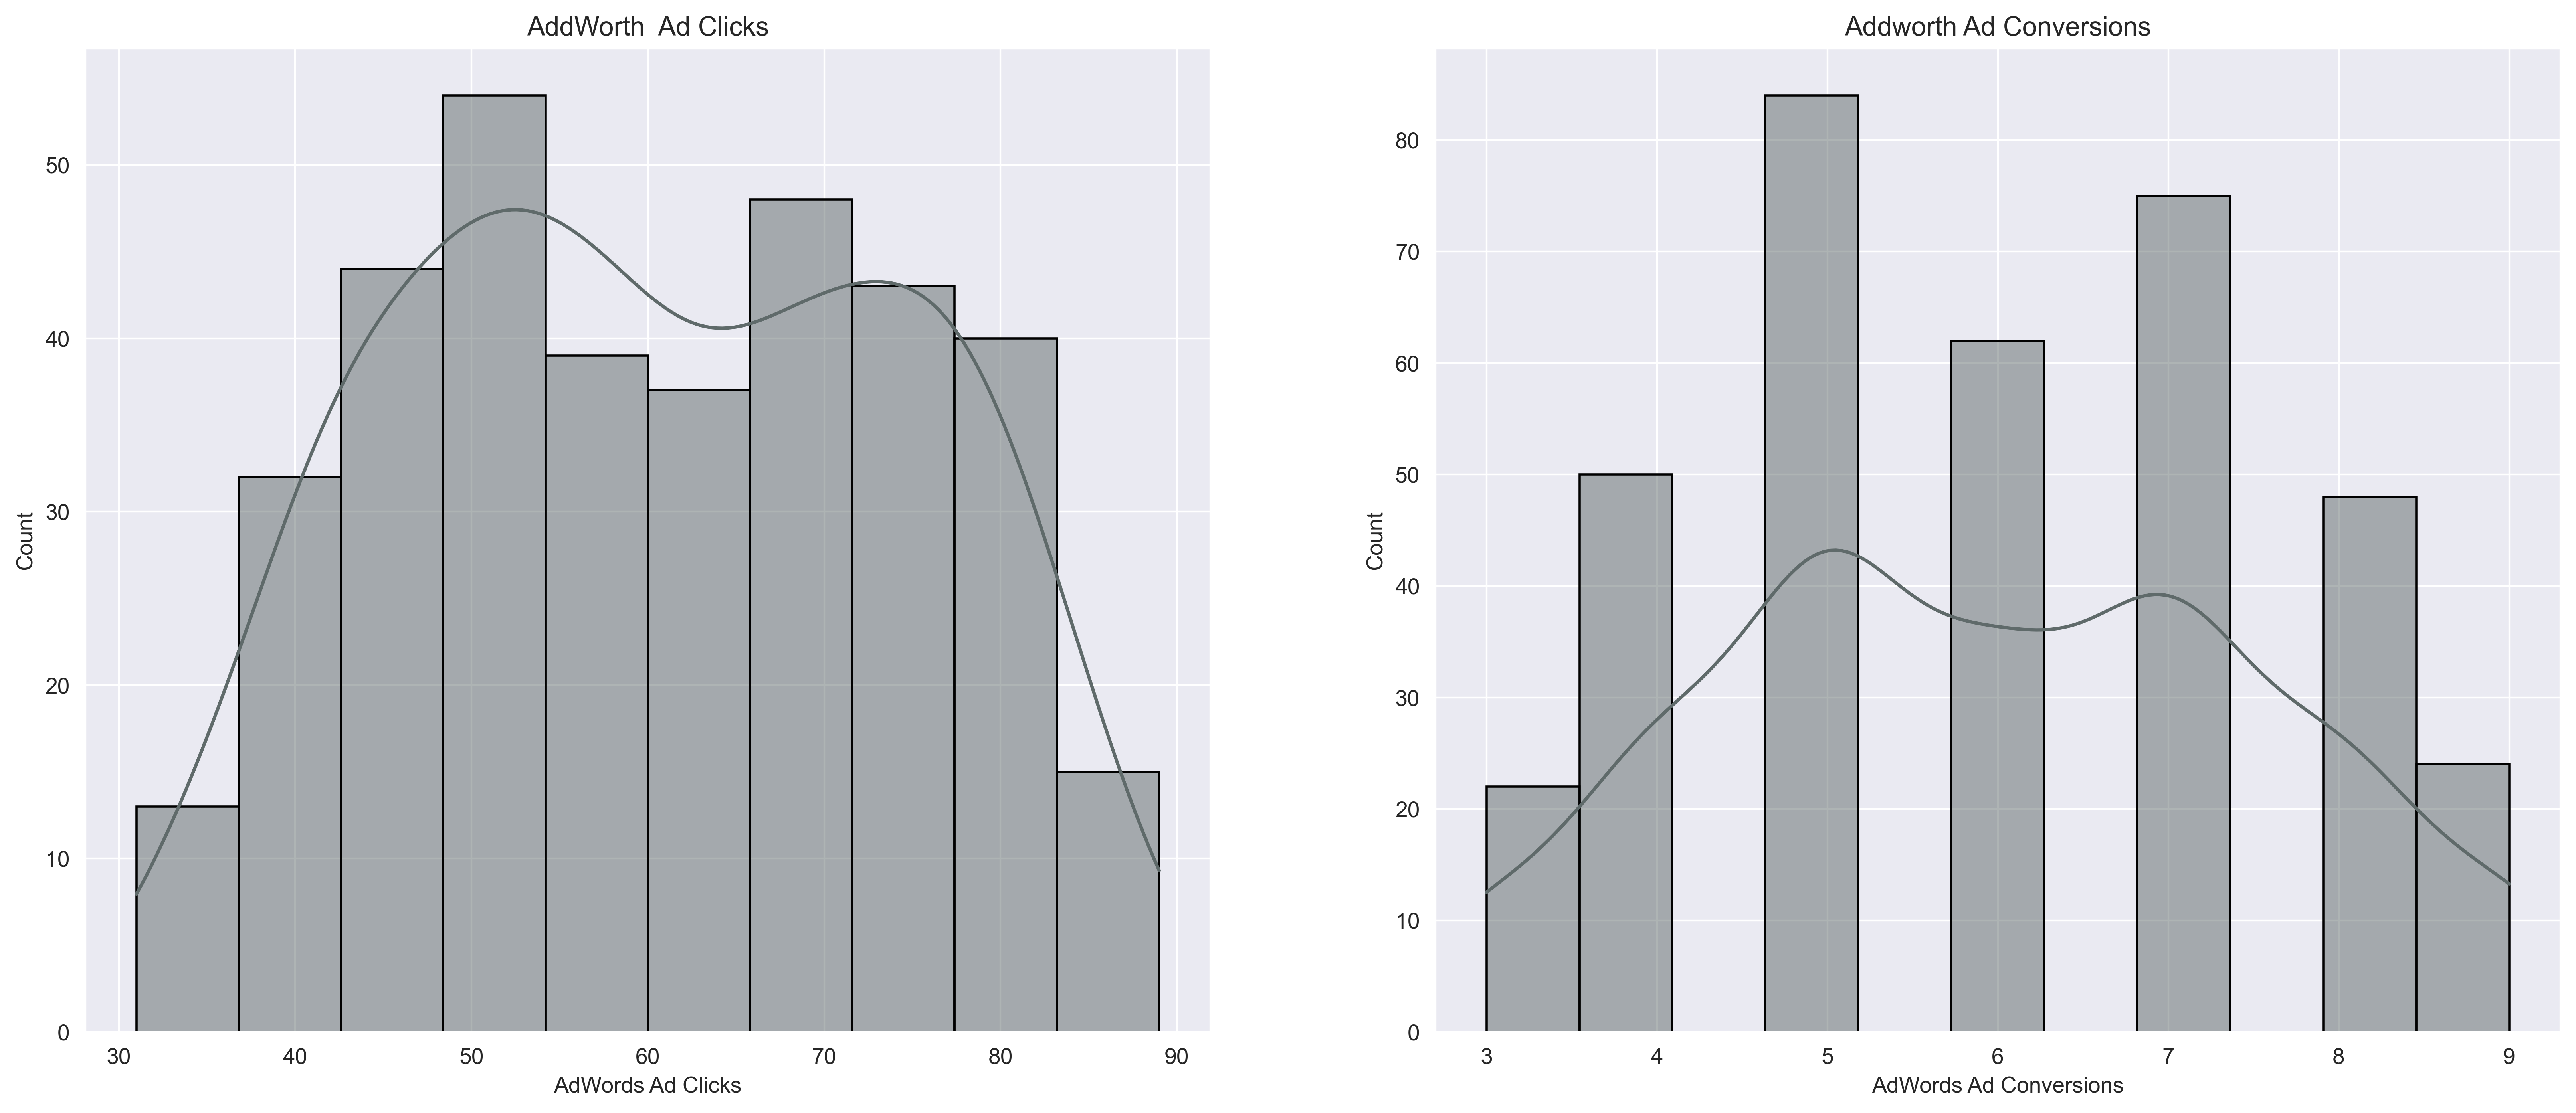

In [120]:
## distribution of clicks and conversions 
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.title("Facebbok Ad Clicks")
sns.histplot(campaign_data['Facebook Ad Clicks'],bins='auto',edgecolor='k',kde=True,color="#5f6a6a")
plt.subplot(1,2,2)
plt.title("Facebook Ad Conversions")
sns.histplot(campaign_data['Facebook Ad Conversions'],bins='auto',edgecolor='k',kde= True,color="#5f6a6a")
plt.show()

## Adworth distribution and conversions  
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("AddWorth  Ad Clicks")
sns.histplot(campaign_data['AdWords Ad Clicks'],bins='auto',edgecolor='k',kde=True,color="#5f6a6a")
plt.subplot(1,2,2)
plt.title("Addworth Ad Conversions")
sns.histplot(campaign_data['AdWords Ad Conversions'],bins='auto',edgecolor='k',kde= True,color="#5f6a6a")
plt.show()

### Insight

* The Histograms tend be approaximately normally distributed,the approaximation of the bell shaped curve suggests that the number of clicks and converions are approximately normally distributed ,they are not many clicks or conersions that are outliers 

#### How often do we observe days with high number of conversions compared to days with low numbers of conersions

In [66]:
## creating a function to calculate the catgory for conersions
def create_conversion_category(conversion_col):  
    category = []  
    for conversion in conversion_col:  
        if conversion < 6:  
            category.append('Slow days (<6)')  
        elif 6 <= conversion < 11:  
            category.append('Okay days (6-10)')  
        elif 11 <= conversion < 16:  
            category.append('Good days (11-15)')  
        else:  
            category.append('Great days (>15)')  
    return category  

In [67]:
## applying the function to both plattforms
campaign_data['Facebook Conversion Category'] = create_conversion_category(campaign_data['Facebook Ad Conversions'])  
campaign_data['AdWords Conversion Category'] = create_conversion_category(campaign_data['AdWords Ad Conversions'])  

In [68]:
###   counting the number of days in Facebook
facebook = pd.DataFrame(campaign_data['Facebook Conversion Category'].value_counts().reset_index().rename(columns={"Facebook Conversion Category":"Category"}))
facebook.head()

,Category,count
0,Good days (11-15),189
1,Okay days (6-10),128
2,Great days (>15),47
3,Slow days (<6),1


In [69]:
##  counting the number of days in Adworths
Adworths =pd.DataFrame(campaign_data['AdWords Conversion Category'].value_counts().reset_index().rename(columns={"AdWords Conversion Category":"Category"}))
Adworths

,Category,count
0,Okay days (6-10),209
1,Slow days (<6),156


In [70]:
## merhing the dataframes  
category_df = pd.merge(facebook,Adworths , on='Category',how='outer').fillna(0)
category_df

,Category,count_x,count_y
0,Good days (11-15),189,0.0
1,Great days (>15),47,0.0
2,Okay days (6-10),128,209.0
3,Slow days (<6),1,156.0


In [71]:
## aranging  
category_df = category_df.iloc[[3,0,2,1]]
category_df

,Category,count_x,count_y
3,Slow days (<6),1,156.0
0,Good days (11-15),189,0.0
2,Okay days (6-10),128,209.0
1,Great days (>15),47,0.0


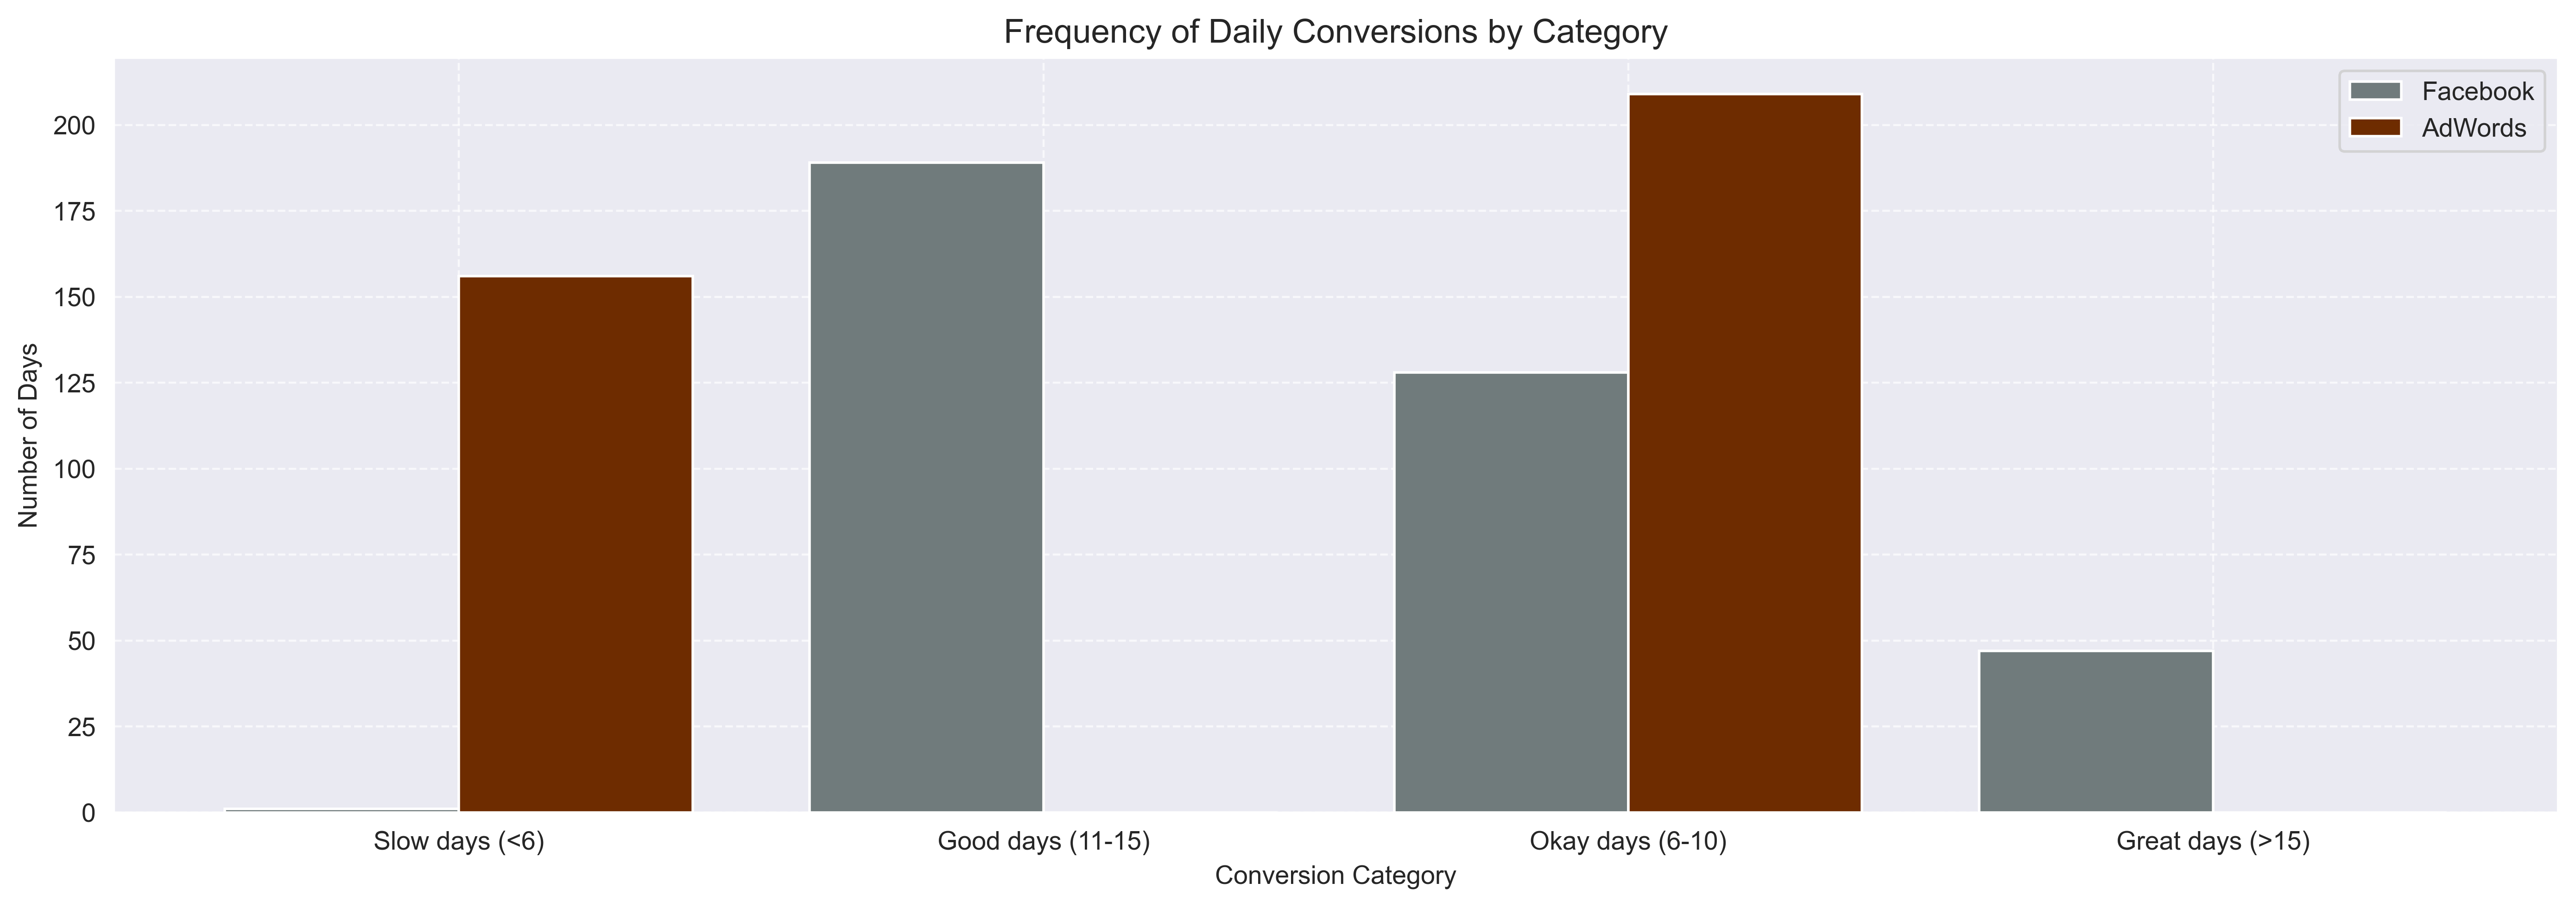

In [119]:
plt.figure(figsize=(14, 5))
categories = category_df['Category'] 
X_axis = np.arange(len(categories))
# Facebook bars (blue)  
plt.bar(X_axis - 0.2,           
        category_df['count_x'],  
        width=0.4,              
        label='Facebook',  
        color='#707b7c')         

# AdWords bars  
plt.bar(X_axis + 0.2,          
        category_df['count_y'],  
        width=0.4,  
        label='AdWords',  
        color='#6e2c00')          
plt.xticks(X_axis, categories)  
plt.xlabel("Conversion Category")  
plt.ylabel("Number of Days")  
plt.title("Frequency of Daily Conversions by Category", fontsize=13)  
plt.legend()                  
plt.grid(axis='both', linestyle='--', alpha=0.7)    
plt.tight_layout()  
plt.show()  

#### Insights
*  From the analysis days with high number of conersions seem to more compared to days with slow number of conerssions
* Although Adworth has more okay days compared to Facebook,Facebook on average has better conversion days compared to Adworth

### Do more clicks on add really lead to more conversions

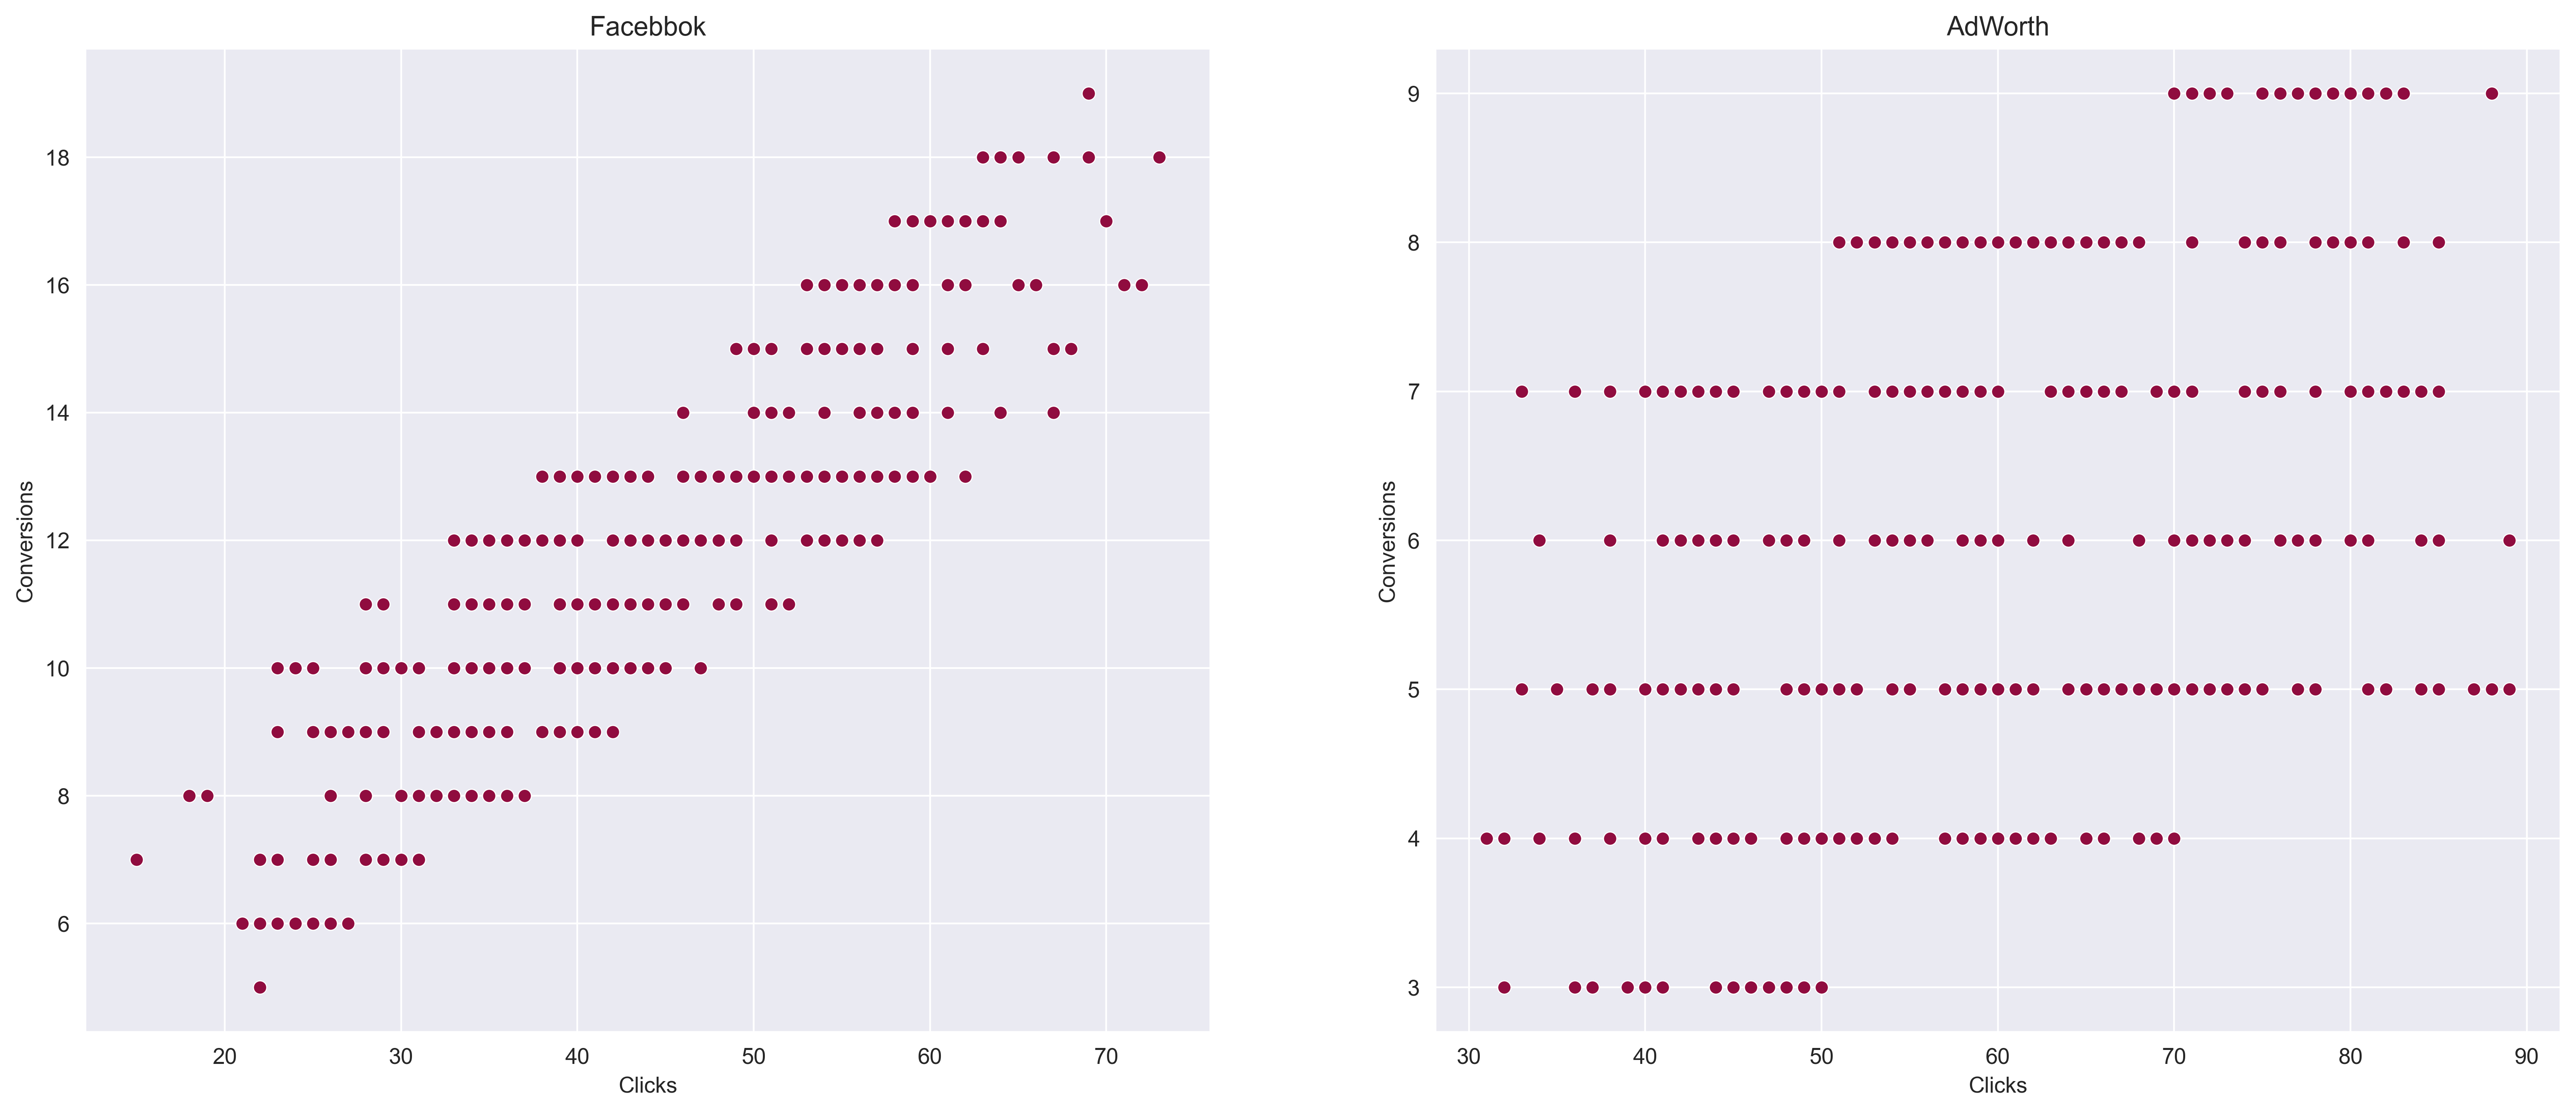

In [118]:
##scatter plot of clicks and conversions 
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Facebbok")
sns.scatterplot(x=campaign_data['Facebook Ad Clicks'],y=campaign_data['Facebook Ad Conversions'],color="#900C3F")
plt.xlabel("Clicks")
plt.ylabel("Conversions")
## Adworth scatterplot and conversions  
plt.subplot(1,2,2)
plt.title("AdWorth")
sns.scatterplot(x=campaign_data['AdWords Ad Clicks'],y=campaign_data['AdWords Ad Conversions'],color="#900C3F")
plt.xlabel("Clicks")
plt.ylabel("Conversions")
plt.show()


##### correlations

In [74]:
## checking for correlations  
facebook_corr = campaign_data['Facebook Ad Clicks'].corr(campaign_data['Facebook Ad Conversions'])
print(f"Facebook Correlation between Clicks and Conversions : {facebook_corr:.2f}")
print(f"Facebook R squared between Clicks and Conversions: {facebook_corr**2*100:.2f}% variation")
print("--"*50)
## correlation for Adworth  
Adworth_corr = campaign_data['AdWords Ad Clicks'].corr(campaign_data['AdWords Ad Conversions'])
print(f"AdWorth Correlation between Clikcs and AdWorth : {Adworth_corr:.2f}")
print(f"AdWorth R squared between Clicks and Conversions: {Adworth_corr**2*100:.2f}% variation")
print("--"*50)
## coeffeiceint of determination (R squarred): 




Facebook Correlation between Clicks and Conversions : 0.87
Facebook R squared between Clicks and Conversions: 76.35% variation
----------------------------------------------------------------------------------------------------
AdWorth Correlation between Clikcs and AdWorth : 0.45
AdWorth R squared between Clicks and Conversions: 20.07% variation
----------------------------------------------------------------------------------------------------


### Insights
* The correlation coefficient between of 0.87 indicates a strong positive  Linear realtionship between  Clicks on Facebook Ads and Sales.This Suggests as the Clicks on Facebook Ads tend to increase , Sales tend to as Well.
* The Strong Correlation Suggests that Facebook Ads are Highly effective in driving Sales ,as a large portion of the variation in sales can be explained by the variation in clicks on Facebook Ads
* The strong Correlation between clicks on Facebook ads and Sales suggest that Facebook Advertising is Highly effective for driving for the Bussiness .Increasing Investment in Facebook Ads or optimizing their performance could be potentially lead to even higher sales
* A correlation coefficeint of 0.45 indicates a moderate positive linear relationship between Clicks on AdWorth and Sales.While there is a still a positive realtionship ,its not as strong as that of Facebook.
* Am moderate correlation between clicks on Adworth  ads and Sales mean While  AdWorth Ads advertising does contribute to Sales ,its effectivveness may be influenced by other factors.Further analysis needed to identify these factors  and optimize Adworth camapaign accordingly.

### Hypothesis Testing



***Hypothesis:*** Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords.

***Null Hypothesis (H0):*** There is no difference in the number of conversions between Facebook and AdWords, or the number of conversions from AdWords is greater than or equal to those from Facebook.

***H0:*** μ_Facebook ≤ μ_AdWords

***Alternate Hypothesis (H1):*** The number of conversions from Facebook is greater than the number of conversions from AdWords.

***H1:*** μ_Facebook > μ_AdWords

In [75]:

# Print mean conversions
print('Mean Conversion \n---------------')
print('Facebook :', round(campaign_data['Facebook Ad Conversions'].mean(), 2))
print('Adwords :', round(campaign_data['AdWords Ad Conversions'].mean(), 2))

# Perform t-test
t_stats, p_value = stats.ttest_ind(
    a=campaign_data['Facebook Ad Conversions'], 
    b=campaign_data['AdWords Ad Conversions'], 
    equal_var=False
)

print('\nT statistic', t_stats, '\np-value', p_value)

# Interpret results at 5% significance level
if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")


Mean Conversion 
---------------
Facebook : 11.74
Adwords : 5.98

T statistic 32.88402060758184 
p-value 9.348918164530465e-134

p-value is less than significance value, Reject the null hypothesis


##### Performing T-test using pingouin  library for a more detail insights

In [ ]:

# Performing t-test with pingouin
results = pg.ttest(
    campaign_data['Facebook Ad Conversions'],
    campaign_data['AdWords Ad Conversions'],
    paired=False,
    alternative='greater', 
    correction=True 
)

# Displaying results.
results


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,32.884021,569.821549,greater,4.674459e-134,"[5.47, inf]",2.434184,1.723e+142,1.0


In [77]:
# Interpret effect size
d = results['cohen-d'].values[0]
print(f"\nCohen's d effect size: {d:.2f}")


Cohen's d effect size: 2.43


In [ ]:
## classify
if abs(d) < 0.2:
    effect = "negligible"
elif abs(d) < 0.5:
    effect = "small"
elif abs(d) < 0.8:
    effect = "medium"
else:
    effect = "large"
    
print(f"The effect size is {effect}.")

# Interpret p-value
if results['p-val'].values[0] < 0.05:
    print("Reject the null hypothesis: Facebook conversions are significantly greater than AdWords conversions.")
else:
    print("Accept the null hypothesis: No evidence that Facebook conversions are greater than AdWords conversions.")

The effect size is large.
Reject the null hypothesis: Facebook conversions are significantly greater than AdWords conversions.


#### Key-Findings.
* The Mean number of Facebook conversions from Facebook Ads which is (11.74) is substantailly higher the Mean number of conversions from Adworth Ads (5.98), this suggests that Facebook advertising , on average is more effective in generating conversions compared to  Adworths Advertising.
* T statsistic (32.88) is a measure of difference between the means of the Two groups relative to the variation within the groups. A large absolute differrence indicates a large difference between the means of the two groups , since  the direction is positive , it means that the mean of Faccebook is greater than that of AdWorth.
* The p-value(4.674459e-134) which is extreamly so small , indicating a strong evidence against the Null hypothesis.
* The Results Strong support the Aterenative hypothesis indicating that the number of concersions from Facebook Ad advertising is need greater then the number of conversions from Adworth Ad Advertisng
* Therefore Facebook Ad Advertising appears to be a more effective channel for generating conversions compared to Adworth adverrsting for generating conversions,based on the sample data analysed.
* Given the significant difference in conersions between the Facebook and AdWorth Consider , we could possibly consider rellocating resources to Facebook advertising efforts, this could mean , increasing Ad spend ,expanding Target Efforts or Experimenting with different Adformats  to capitalize on the platforms effectivenss in driving concverrsions.

#### Regression Analysis

* How many Facebook conersions can i expect given a certain number of given a certain number of Facebooks and Clicks.

In [79]:
# Prepare data
x = campaign_data['Facebook Ad Clicks'].values.reshape(-1, 1)
y = campaign_data['Facebook Ad Conversions']

In [80]:
## print  
x[:5]

array([[18],
       [36],
       [26],
       [27],
       [15]])

In [81]:
## print 
y[:5]

0     8
1    12
2     8
3     9
4     7
Name: Facebook Ad Conversions, dtype: int64

In [82]:
# Initialize and train model
reg_model = LinearRegression()
reg_model.fit(x, y)

LinearRegression()

In [83]:
# Make predictions
predictions = reg_model.predict(x)

In [84]:
# Model evaluation
r2 = r2_score(y, predictions)
mse = mean_squared_error(y, predictions)
print(f'Accuracy (R² Score): {round(r2, 2)}')
print(f'Mean Squared Error: {round(mse, 2)}')

Accuracy (R² Score): 0.76
Mean Squared Error: 2.02


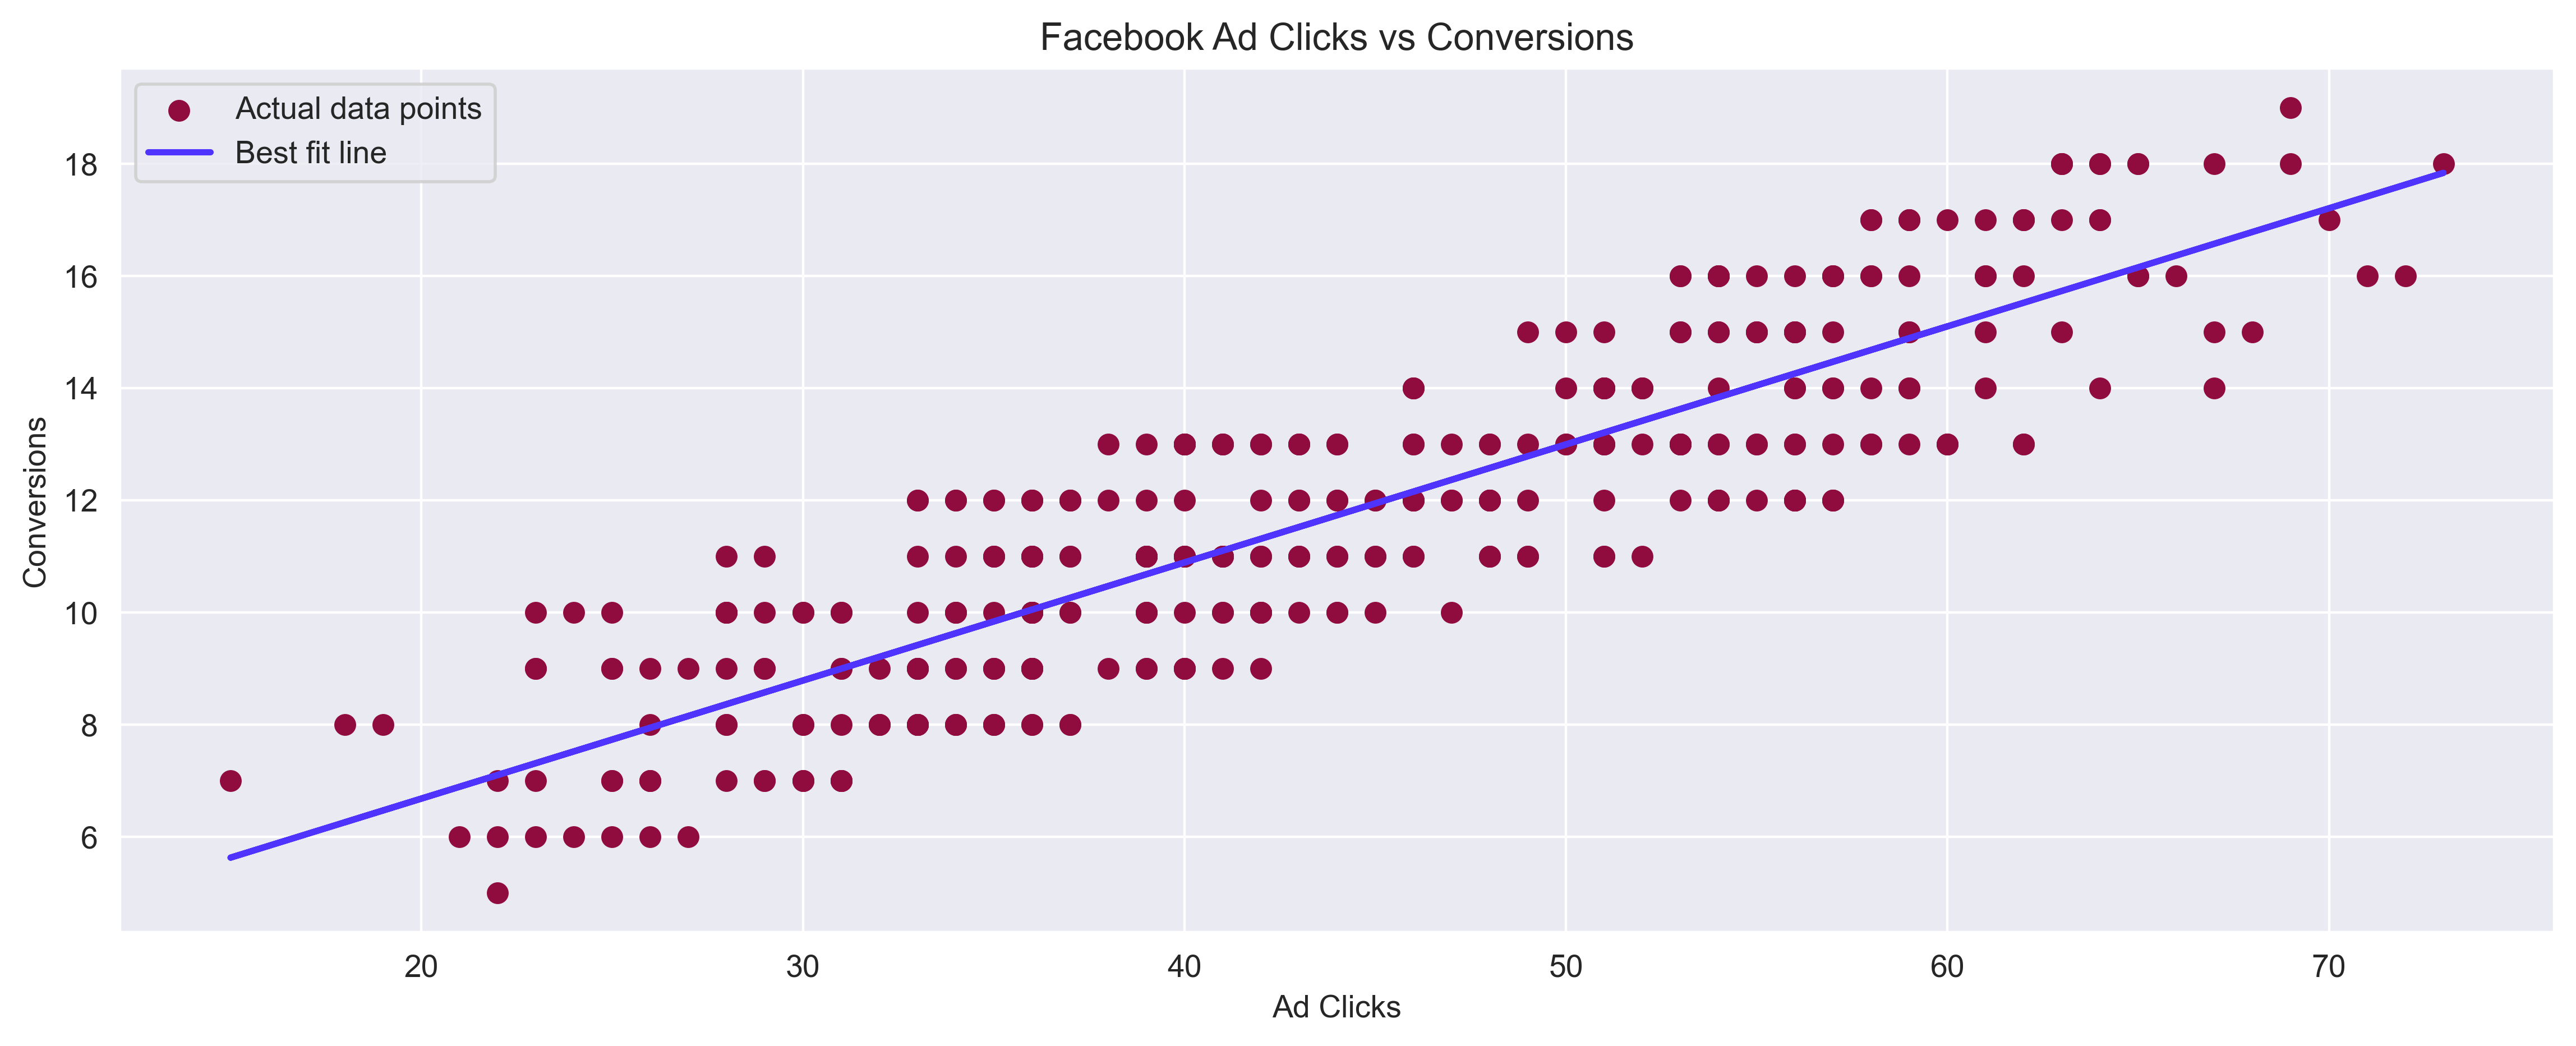

In [117]:
# Plotting
plt.figure(figsize=(14, 5))
plt.scatter(x, y, color='#900C3F', label='Actual data points')
plt.plot(x, predictions, color='#4f33ff', linewidth=2, label='Best fit line')
plt.title('Facebook Ad Clicks vs Conversions')
plt.xlabel('Ad Clicks')
plt.ylabel('Conversions')
plt.legend()
plt.grid(True)
plt.show()

In [86]:
# Prediction for 80 clicks
clicks = [[80]] 
predicted_conversion = reg_model.predict(clicks)[0]
print(f'For 80 Clicks, Expected Conversion is : {round(predicted_conversion, 2)}')

For 80 Clicks, Expected Conversion is : 19.31


In [87]:
## for 100 clicks
clicks = [[1000]] 
predicted_conversion = reg_model.predict(clicks)[0]
print(f'For 100 Clicks, Expected Conversion is : {round(predicted_conversion, 2)}')

For 100 Clicks, Expected Conversion is : 212.97


In [88]:
##getting the coefficent
coefficients = reg_model.coef_
print(f"The coeffiecint of Facebook Ad-Clicks is {coefficients[0]:.3f}")

The coeffiecint of Facebook Ad-Clicks is 0.211


##### key Insights
* The Model has a reasonably good predictive power,with a R2 score of (76.35%) which means that 76.35% of the varaiton of Facebook Conversion is explained by  Facebook Ad Clicks. meaning there is reasonalbly a small proprtion left thats is unexplained.


#### Analysing Facebook Metrics Over Time

In [89]:
## data
campaign_data['Facebook Click-Through Rate (Clicks / View)'].unique()

array(['0.83%', '1.15%', '0.84%', '2.45%', '1.10%', '1.86%', '1.66%',
       '1.74%', '1.44%', '2.15%', '2.78%', '3.61%', '2.84%', '2.35%',
       '3.74%', '1.23%', '0.97%', '2.08%', '1.06%', '2.02%', '1.39%',
       '1.49%', '1.55%', '2.25%', '3.21%', '1.29%', '2.16%', '2.06%',
       '3.43%', '0.99%', '1.33%', '0.88%', '1.08%', '2.99%', '3.05%',
       '1.59%', '1.12%', '3.25%', '1.58%', '1.61%', '1.82%', '1.48%',
       '1.21%', '1.99%', '0.92%', '3.11%', '1.47%', '3.01%', '1.68%',
       '4.55%', '1.42%', '2.13%', '3.33%', '1.73%', '3.55%', '1.62%',
       '1.45%', '2.81%', '1.97%', '2.04%', '1.22%', '5.37%', '3.29%',
       '4.63%', '3.03%', '3.23%', '1.63%', '1.71%', '1.60%', '1.80%',
       '1.57%', '2.31%', '1.25%', '2.82%', '1.34%', '1.88%', '1.13%',
       '2.05%', '1.26%', '3.34%', '4.61%', '1.28%', '4.32%', '3.16%',
       '1.16%', '2.39%', '2.68%', '2.38%', '5.10%', '3.10%', '1.03%',
       '1.31%', '1.94%', '2.10%', '1.09%', '2.11%', '3.48%', '1.91%',
       '1.36%', '4.4

In [90]:
### Facebook Conversions  
campaign_data['Facebook Conversion Rate (Conversions / Clicks)'].unique()

array(['42.73%', '34.04%', '31.45%', '34.76%', '47.59%', '28.22%',
       '30.22%', '24.09%', '33.74%', '32.29%', '27.86%', '25.36%',
       '24.15%', '27.08%', '21.79%', '23.26%', '34.13%', '32.53%',
       '26.73%', '26.00%', '23.05%', '26.47%', '34.39%', '26.91%',
       '25.75%', '24.20%', '24.41%', '23.61%', '24.61%', '38.18%',
       '23.25%', '36.26%', '27.60%', '39.69%', '23.57%', '27.25%',
       '25.95%', '32.74%', '32.17%', '32.35%', '34.12%', '30.45%',
       '29.19%', '25.01%', '26.56%', '24.75%', '27.81%', '32.86%',
       '29.84%', '22.10%', '31.70%', '26.25%', '22.09%', '27.92%',
       '24.51%', '34.29%', '27.23%', '21.84%', '27.01%', '27.07%',
       '27.59%', '29.39%', '27.83%', '29.11%', '40.58%', '24.50%',
       '25.09%', '22.31%', '28.18%', '27.39%', '22.58%', '23.02%',
       '29.29%', '28.46%', '34.49%', '33.55%', '22.08%', '31.33%',
       '31.11%', '21.87%', '24.88%', '32.66%', '25.49%', '25.15%',
       '24.03%', '27.19%', '23.38%', '25.10%', '34.66%', '27.6

In [91]:
## click  
campaign_data['Facebook Cost per Click (Ad Cost / Clicks)'].unique()

array(['$7.14', '$2.91', '$3.89', '$2.62', '$5.38', '$3.08', '$0.76',
       '$2.14', '$2.63', '$1.53', '$0.80', '$2.19', '$1.83', '$1.58',
       '$1.05', '$3.01', '$3.61', '$2.38', '$2.27', '$1.31', '$2.97',
       '$2.20', '$3.04', '$2.45', '$0.96', '$3.73', '$2.44', '$0.93',
       '$0.98', '$3.06', '$2.65', '$3.49', '$3.58', '$5.63', '$0.86',
       '$2.59', '$3.26', '$1.94', '$2.09', '$4.49', '$2.22', '$1.72',
       '$1.99', '$3.62', '$3.78', '$1.41', '$1.34', '$3.24', '$2.49',
       '$4.22', '$1.33', '$1.59', '$3.76', '$2.02', '$1.27', '$2.01',
       '$1.61', '$4.17', '$1.51', '$1.80', '$2.26', '$5.84', '$3.71',
       '$4.32', '$0.73', '$1.93', '$1.28', '$3.00', '$3.96', '$2.93',
       '$1.29', '$1.47', '$2.08', '$2.06', '$2.81', '$1.91', '$2.70',
       '$3.84', '$2.83', '$2.88', '$2.79', '$1.16', '$3.35', '$1.26',
       '$1.25', '$2.94', '$2.43', '$2.23', '$1.50', '$1.62', '$1.96',
       '$3.30', '$2.00', '$2.05', '$3.18', '$1.35', '$1.84', '$2.07',
       '$1.92', '$2.

In [92]:
## cost per facebook Ad  
campaign_data['Cost per Facebook Ad'].unique()

array(['$126', '$104', '$102', '$71', '$78', '$113', '$37', '$105', '$96',
       '$62', '$41', '$123', '$88', '$67', '$59', '$92', '$95', '$66',
       '$97', '$85', '$106', '$50', '$89', '$111', '$51', '$43', '$84',
       '$82', '$86', '$94', '$143', '$48', '$107', '$110', '$61', '$64',
       '$129', '$121', '$34', '$53', '$115', '$46', '$119', '$118', '$70',
       '$132', '$112', '$69', '$93', '$40', '$99', '$142', '$116', '$131',
       '$76', '$54', '$100', '$73', '$101', '$103', '$75', '$140', '$65',
       '$108', '$58', '$60', '$74', '$114', '$80', '$120', '$90', '$55',
       '$42', '$130', '$56', '$79', '$49', '$44', '$144', '$57', '$63',
       '$83', '$134', '$52', '$87', '$68', '$98', '$136', '$47', '$135',
       '$109', '$138', '$122', '$91', '$72', '$127', '$128', '$81',
       '$124', '$38', '$125', '$117', '$139', '$77'], dtype=object)

In [93]:
## data cleaning (removing unwanted strings in elements and converting them to numerical columns)
campaign_data['Facebook Click-Through Rate (Clicks / View)'] = campaign_data['Facebook Click-Through Rate (Clicks / View)'].str.split("%").str[0].astype(float)
campaign_data['Facebook Conversion Rate (Conversions / Clicks)'] = campaign_data['Facebook Conversion Rate (Conversions / Clicks)'].str.split("%").str[0].astype(float)
campaign_data['Facebook Cost per Click (Ad Cost / Clicks)'] = campaign_data['Facebook Cost per Click (Ad Cost / Clicks)'].str.split("$").str[1].astype(float)
campaign_data['Cost per Facebook Ad'] = campaign_data['Cost per Facebook Ad'].apply(lambda x: float(x[1:]))


In [94]:
campaign_data.head(1)

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Conversion Category,AdWords Conversion Category
0,2019-01-01,FB_Jan19,2116,18,8,126.0,0.83,42.73,7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30,Okay days (6-10),Slow days (<6)


In [95]:
## filtering out Facebook Campaign  
df = campaign_data[['Date','Facebook Ad Views','Facebook Ad Clicks','Facebook Ad Conversions','Facebook Click-Through Rate (Clicks / View)', 
                    'Facebook Conversion Rate (Conversions / Clicks)','Facebook Cost per Click (Ad Cost / Clicks)','Cost per Facebook Ad'
                    
                    ]]
## dissplaying the df  
df.head()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),Cost per Facebook Ad
0,2019-01-01,2116,18,8,0.83,42.73,7.14,126.0
1,2019-01-02,3106,36,12,1.15,34.04,2.91,104.0
2,2019-01-03,3105,26,8,0.84,31.45,3.89,102.0
3,2019-01-04,1107,27,9,2.45,34.76,2.62,71.0
4,2019-01-05,1317,15,7,1.10,47.59,5.38,78.0


##### At what times of the days of the week do we observe conversions

In [96]:


# Create a 'Month' column with full month names (e.g., "January", "February")
df['Month'] = df['Date'].dt.month_name()

# Define the order of months (January to December)
month_order = [
    'January', 'February', 'March', 'April',
    'May', 'June', 'July', 'August',
    'September', 'October', 'November', 'December'
]

# Convert 'Month' to a categorical column with the defined order
df['Month'] = pd.Categorical(
    df['Month'],
    categories=month_order,
    ordered=True
)

# Sort the DataFrame by the ordered 'Month' column
df.sort_values(by='Month', inplace=True)

# Reset index for cleanliness (optional)
df.reset_index(drop=True, inplace=True)

In [97]:
## week column 
## creating the data column 
df['Week_day'] = df['Date'].dt.day_name()
##  creating week column       
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
## creating a week column  
df['Week_day'] = pd.Categorical(df['Week_day'],categories=week_order,ordered=True)
# Sort the DataFrame by the ordered 'Month' column
df.sort_values(by='Week_day', inplace=True)

# Reset index for cleanliness (optional)
df.reset_index(drop=True, inplace=True)

In [98]:
## checking the df  
df.head()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),Cost per Facebook Ad,Month,Week_day
0,2019-08-05,2589,33,8,1.29,23.00,3.36,112.0,August,Monday
1,2019-07-22,1374,54,13,3.92,23.72,1.73,93.0,July,Monday
2,2019-02-18,3299,31,9,0.92,29.84,3.78,115.0,February,Monday
3,2019-09-09,3038,60,13,1.98,21.66,1.07,64.0,September,Monday
4,2019-09-02,3175,51,13,1.60,25.89,1.83,93.0,September,Monday


In [99]:
# Group by weekday and sum conversions
weekly_conversion = df.groupby('Week_day',observed=False)[['Facebook Ad Conversions']].sum().reset_index()
weekly_conversion

,Week_day,Facebook Ad Conversions
0,Monday,601
1,Tuesday,635
2,Wednesday,639
3,Thursday,596
4,Friday,614
5,Saturday,602
6,Sunday,599


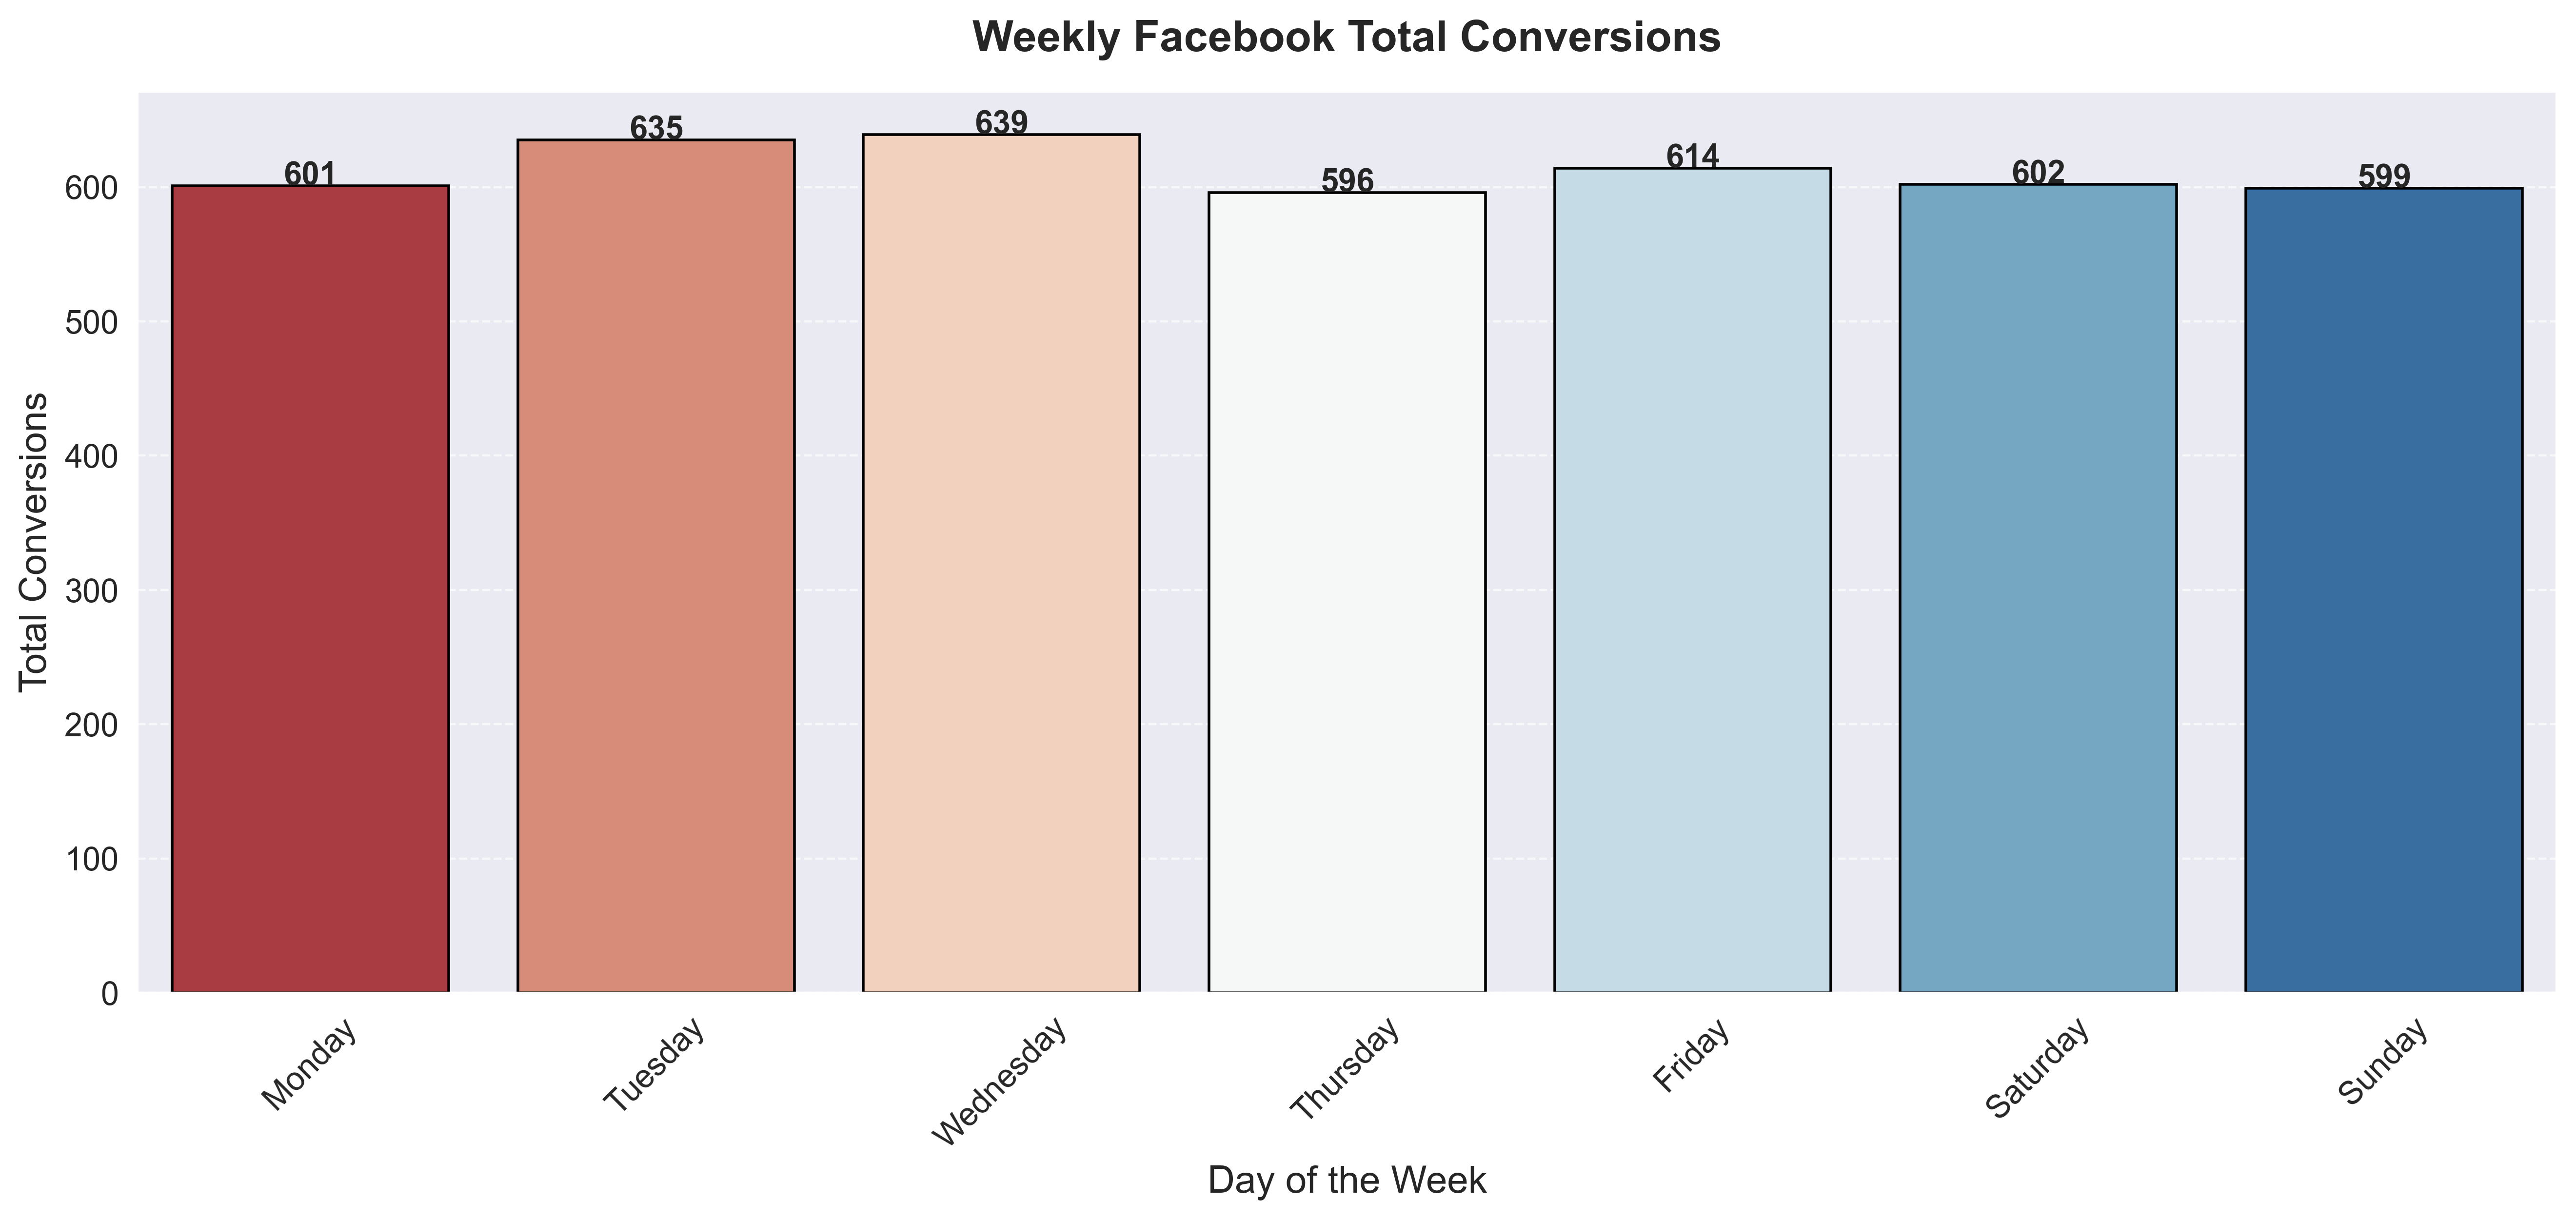

In [115]:

# Set figure size
plt.figure(figsize=(16, 6))

# Barplot with enhancements
sns.barplot(data=weekly_conversion, 
            x='Week_day', 
            y='Facebook Ad Conversions', 
            palette='RdBu', 
            edgecolor='black')

# Add title and labels
plt.title("Weekly Facebook Total Conversions", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Total Conversions", fontsize=14)

# Rotate x-axis labels if needed
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Show data values on bars
for index, value in enumerate(weekly_conversion["Facebook Ad Conversions"]):
    plt.text(index, value + 0.8, str(value), ha='center', fontsize=12, fontweight='bold')

# Grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [101]:
### Monthly Conersions 
monthly_conversions = df.groupby("Month")[['Facebook Ad Conversions']].sum().reset_index()
monthly_conversions

,Month,Facebook Ad Conversions
0,January,334
1,February,298
2,March,347
3,April,334
4,May,341
5,June,343
6,July,375
7,August,349
8,September,377
9,October,405


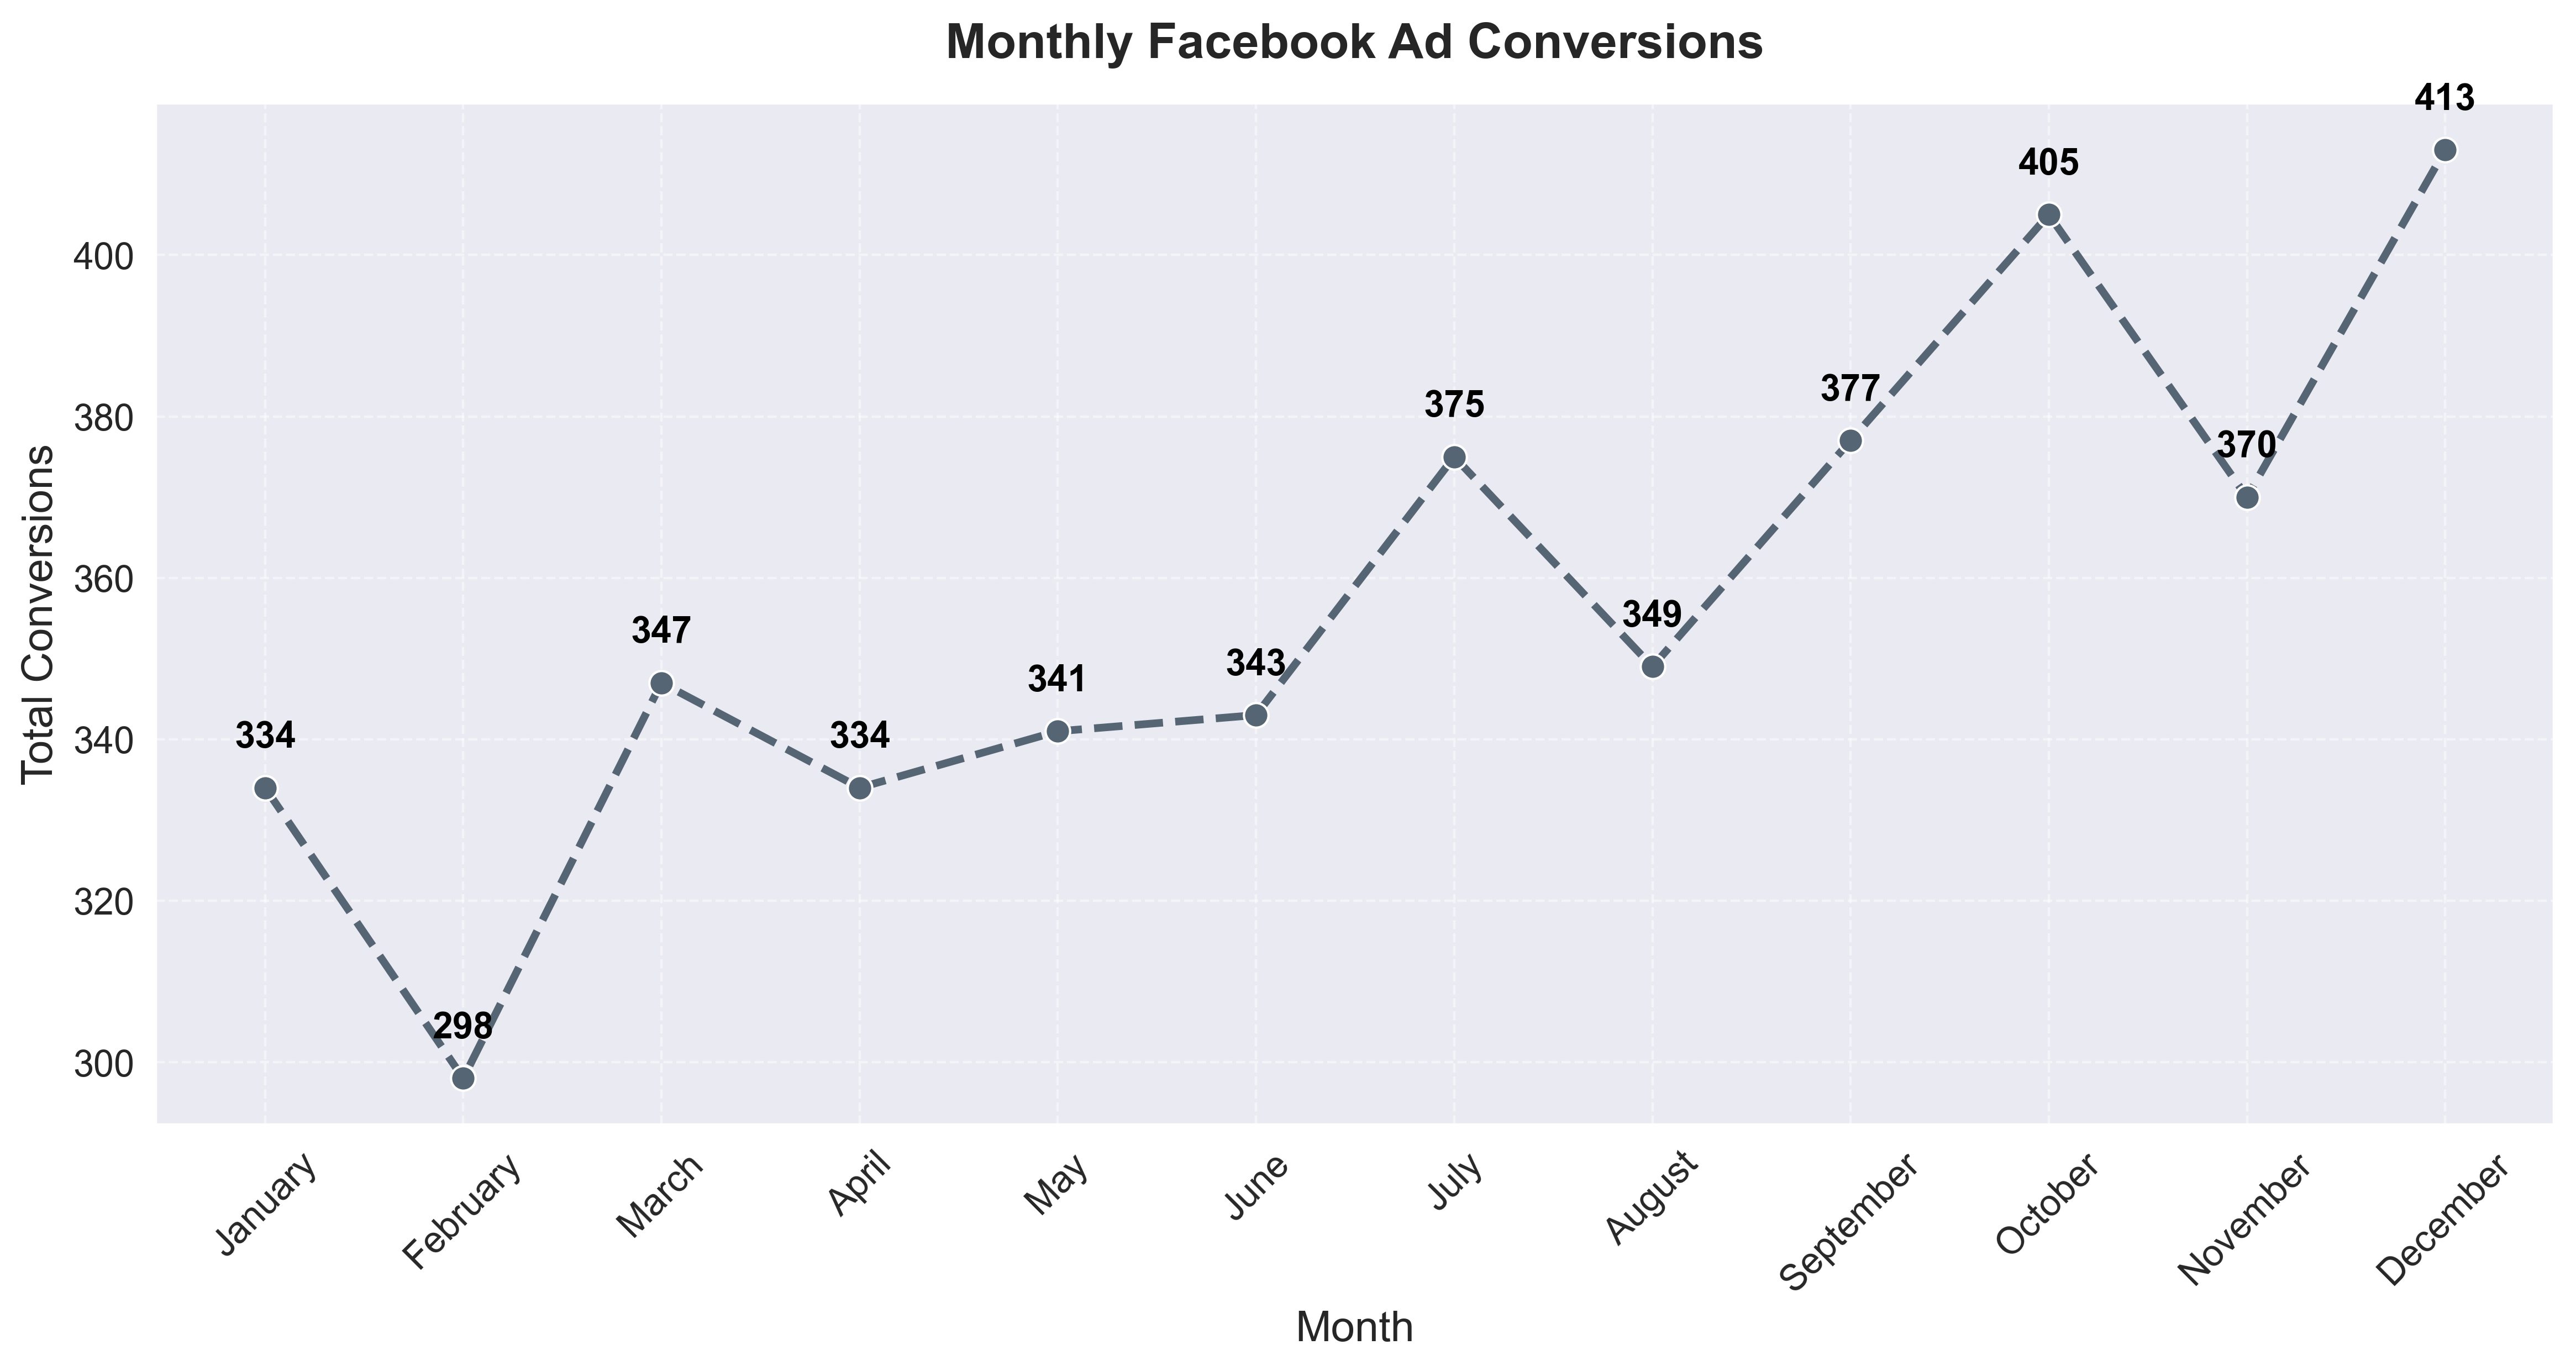

In [111]:

# Set figure size
plt.figure(figsize=(14, 6))

# Line plot with enhancements
sns.lineplot(data=monthly_conversions, 
             x='Month', 
             y='Facebook Ad Conversions', 
             color='#566573', 
             marker='o',  
             markersize=8, 
             linewidth=2.5, linestyle='--')

# Add title and labels
plt.title("Monthly Facebook Ad Conversions", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Conversions", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(axis='both', linestyle='--', alpha=0.5)

# Show data values on points
for index, row in monthly_conversions.iterrows():
    plt.text(row['Month'], row['Facebook Ad Conversions'] + 5, 
             str(row['Facebook Ad Conversions']), 
             ha='center', fontsize=12, fontweight='bold', color='black')

# Show the plot
plt.show()


### Key Insights
* Across the week days over a year,the total number of conversions remains relativelly consistent, indicating a consistent level of engagement through out the week.
* Howevever Mondays ,Tuesday and Wednesday consistently exhibit higher number of conversions compared to other days,suggestig that the beggining of the week sees heightened user engagement or responsiveenss to market efforts
* Examining the Monthly Trend reveals an overall upward trajectory ,increasing a general increase in conversion over time,some months stand out with  varaitions in coneresion rates

##### How does the Cost Per Convversion Trend Over Time

In [103]:
## creating the new column cpc  
cpc_df = df.groupby("Month")[['Facebook Ad Conversions','Cost per Facebook Ad']].sum()
cpc_df['cost_per_conversion'] = cpc_df['Cost per Facebook Ad']/cpc_df['Facebook Ad Conversions']
cpc_df = cpc_df.reset_index()
cpc_df

,Month,Facebook Ad Conversions,Cost per Facebook Ad,cost_per_conversion
0,January,334,2594.0,7.766467
1,February,298,2497.0,8.379195
2,March,347,2903.0,8.365994
3,April,334,2614.0,7.826347
4,May,341,2435.0,7.140762
5,June,343,2581.0,7.524781
6,July,375,2692.0,7.178667
7,August,349,2493.0,7.143266
8,September,377,2682.0,7.114058
9,October,405,2969.0,7.330864


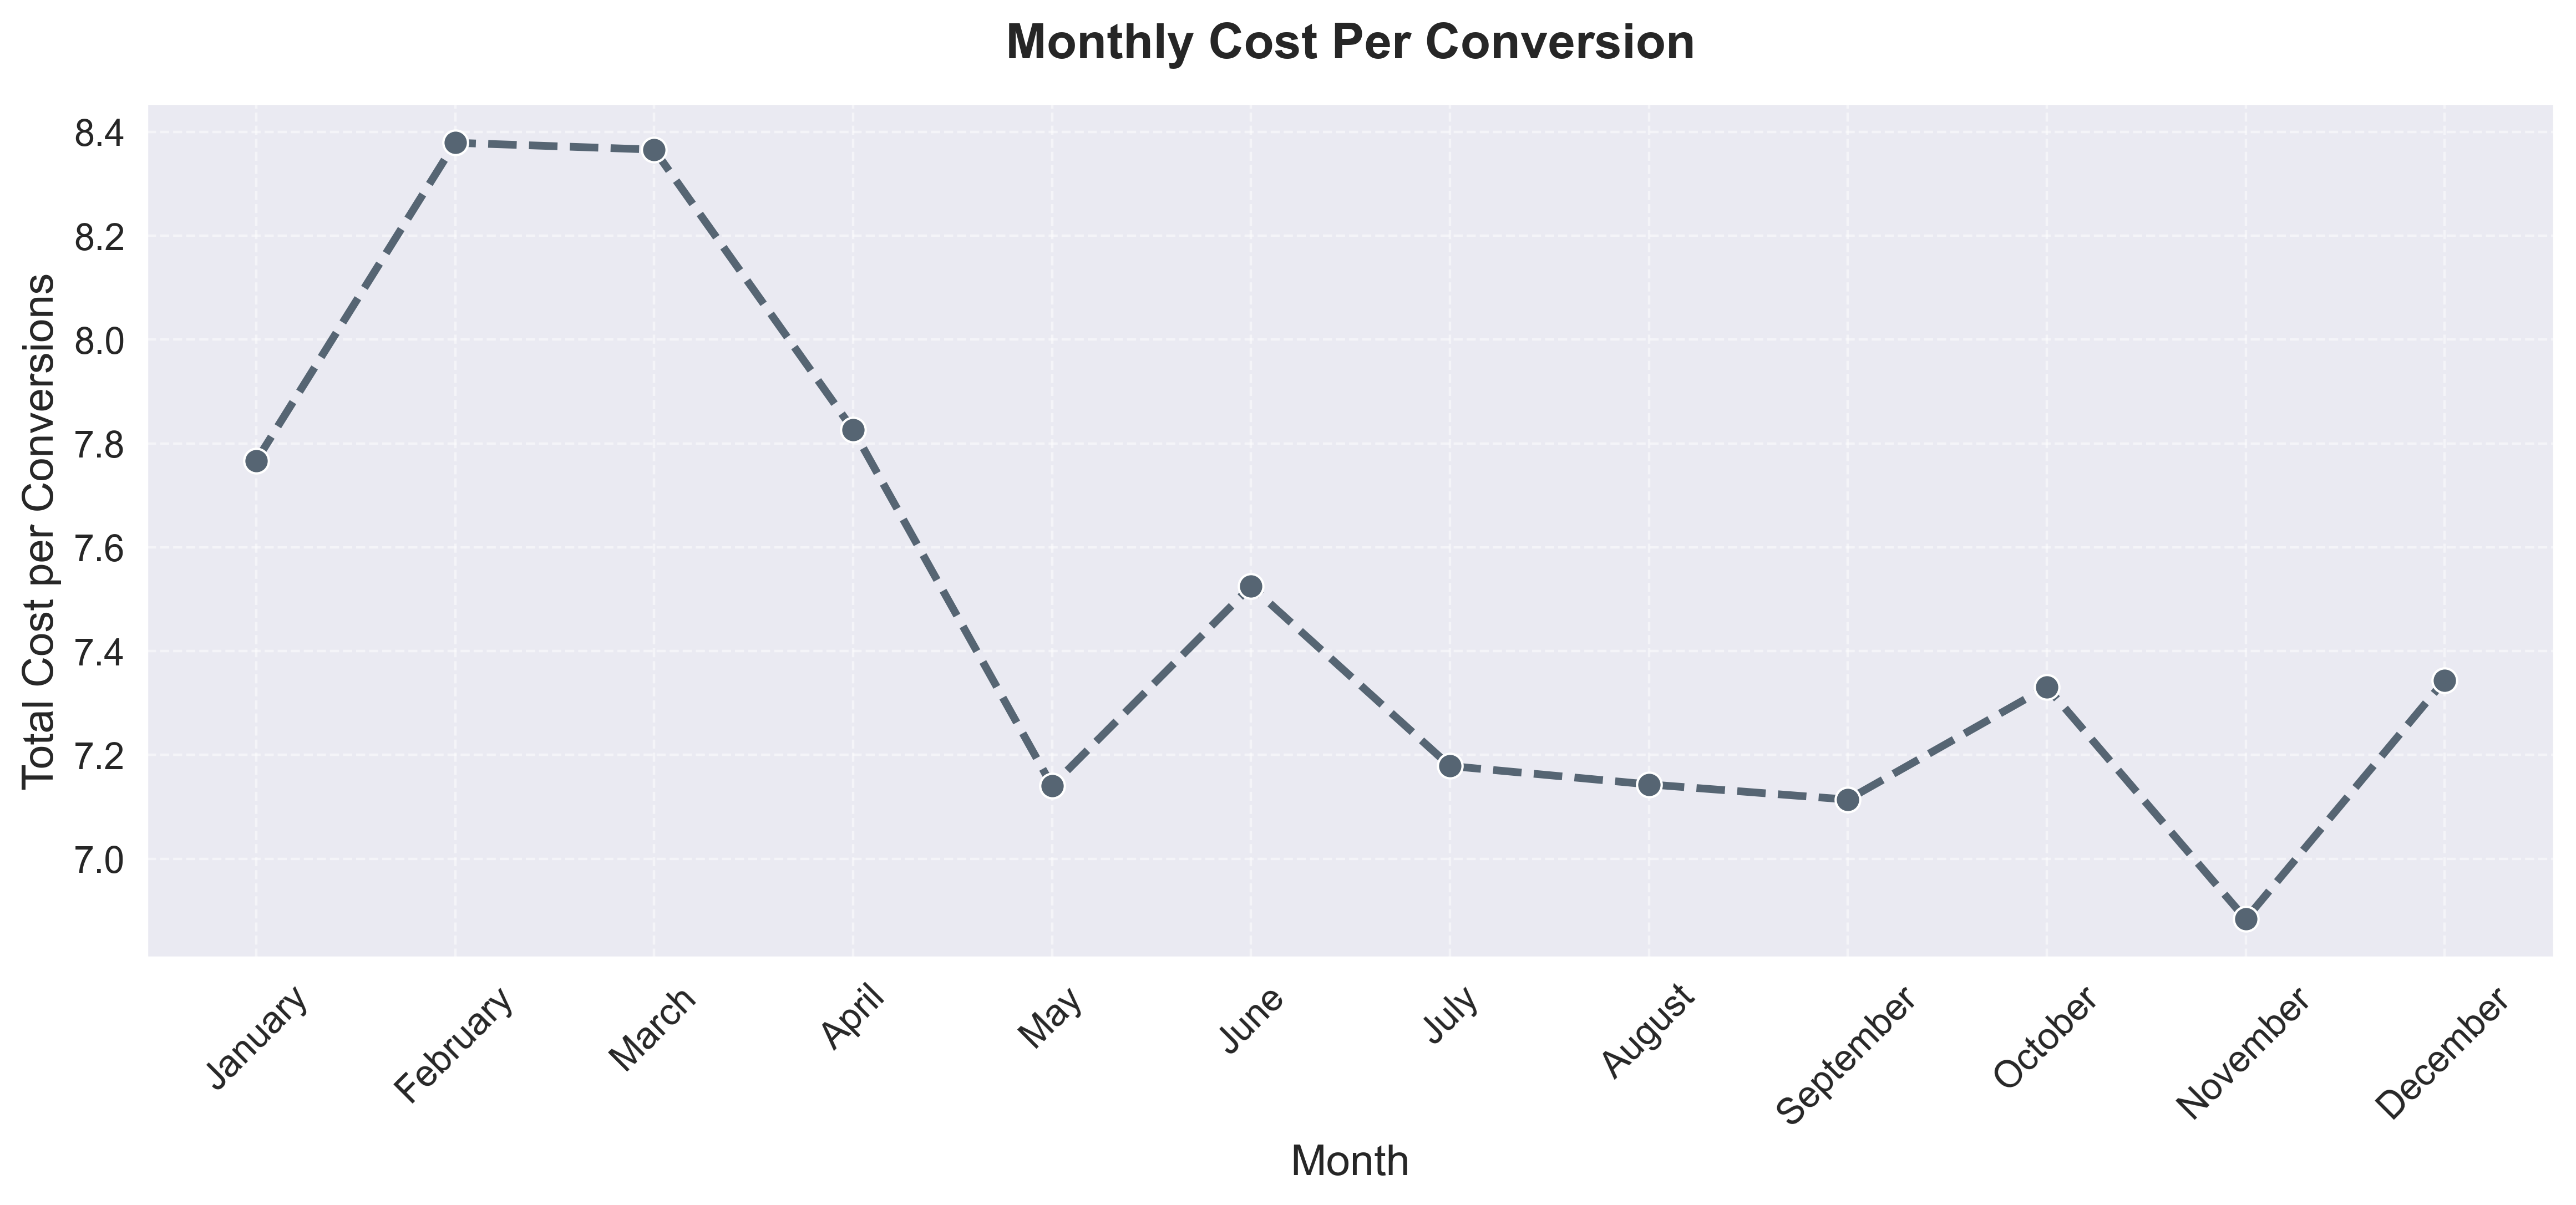

In [112]:
# Set figure size
plt.figure(figsize=(14, 5))

# Line plot with enhancements
sns.lineplot(
    data=cpc_df, 
    x='Month', 
    y='cost_per_conversion', 
    color='#566573', 
    marker='o',  
    markersize=8, 
    linewidth=2.5, 
    linestyle='--'
)

# Add title and labels
plt.title("Monthly Cost Per Conversion", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Cost per Conversions", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(axis='both', linestyle='--', alpha=0.5)

# Show the plot
plt.show()


#### Is there  a Long Term Equilibrium relationship between advertising spend conersion rates

In [105]:

## co intergration for lon term eqiulibrium
score, p_value, _ = coint(df['Cost per Facebook Ad'], df['Facebook Ad Conversions'])
print("Cointegration Test Statistic:", score)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject H₀: Variables are cointegrated (long-term relationship exists).")
else:
    print("Fail to reject H₀: No cointegration.")

Cointegration Test Statistic: -19.571978283011465
P-value: 0.0
Reject H₀: Variables are cointegrated (long-term relationship exists).


#### Conclusion.
* From the research , based on the data , i can make a conclusion that Facebook is a better platform as its more effective interms of conersions,clicks and over all cost effectiveness